# Actividad Evaluable 4: Patrones con K-means


In [ ]:
PREGUNTAS
    ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
    Sí ya que no hay demasiados centros y estos estan en un rango medio dentro de los valores
    
    ¿Cómo obtuviste el valor de k a usar?
    
    
    ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
    
    ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?
    
    ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
    
    ¿Qué puedes decir de los datos basándose en los centros?


## Integrantes: 
**Rosa Vanessa Palacios Beltrán | A01652612**

**Diego Reyna Reyes | A01657387**

**José Roberto Garduño Cerecedo | A01656294**

**Luis Angel Gonzalez Tapia| A01654625**

**Samuel Sandoval Delgado | A01656191**

**Daniel Rong Chen | A01656992**

Para esta actividad se detectarán los patrones con la técnica de clustering **K-means** usando los datos del archivo avocado.csv

1. Cargar tus datos

In [ ]:
#Importar las librerias para el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

El archivo avocado contiene 14 categorias:


1. Date
2. AveragePrice
3. Type
4. Year
5. Region
6. Total Volumen
7. 4046
8. 4225
9. 4770
10. Unnamed
11. Total Bags
12. Small Bags
13. Large Bags
14. XLarge Bags






Para esta actividad solo tendrémos en cuenta 3 variables:


*   AveragePrice
*   Unnamed: Número de la semana del año
*   Year

Esto porque es nos ayuda a poder determinar valores de compra y producción deacuerdo al tiempo.

La decisión de usar las tres variables anteriormente mencionadas fueron basandonos en el Hisograma a continuación:


In [ ]:
dataframe.drop(['region'],1).hist()
plt.show()

<ipython-input-54-8236a7d8e514>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['region'],1).hist()


In [ ]:
print(dataframe["AveragePrice"].shape)

In [ ]:
print(dataframe["Unnamed: 0"].shape)

In [ ]:
print(dataframe["year"].shape)

In [ ]:
sb.pairplot(dataframe.dropna(), hue='type',height=4,vars=["AveragePrice","year","Unnamed: 0"],kind='scatter')

In [ ]:
X = np.array(dataframe[["AveragePrice","year","Unnamed: 0"]])
y = np.array(dataframe['type'])
X.shape

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
colores=['blue','red']
asignar=[]

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

 3. Determina un valor de k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

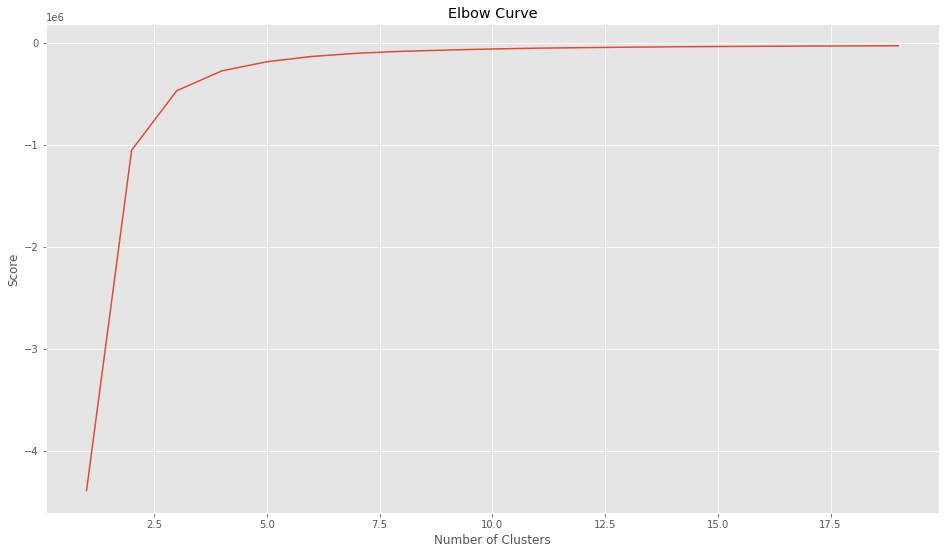

In [36]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Con la gráfica anterior decidimos que el valor de K sea 5 porque es nuestro "punto de codo".

4. Utilizando scikitlearn calcula los centros del algoritmo k-means.

In [37]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.39622917e+00 2.01650000e+03 4.50000000e+00]
 [1.35595062e+00 2.01600000e+03 3.55000000e+01]
 [1.54628042e+00 2.01611429e+03 1.47428571e+01]
 [1.43629630e+00 2.01600000e+03 2.55000000e+01]
 [1.29031616e+00 2.01602916e+03 4.61722540e+01]]


In [38]:
dist_c = np.zeros((5,5))
for i,c1 in enumerate(centroids):
  for j,c2 in enumerate(centroids):
    dist_c[i,j] = np.sqrt((c1[0]-c2[0])**2+(c1[1]-c2[1])**2+(c1[2]-c2[2])**2)
print(dist_c)

[[ 0.         31.00405816 10.25121521 21.00598975 41.67504841]
 [31.00405816  0.         20.75833004 10.00032277 10.67249569]
 [10.25121521 20.75833004  0.         10.75831214 31.43055443]
 [21.00598975 10.00032277 10.75831214  0.         20.67279001]
 [41.67504841 10.67249569 31.43055443 20.67279001  0.        ]]


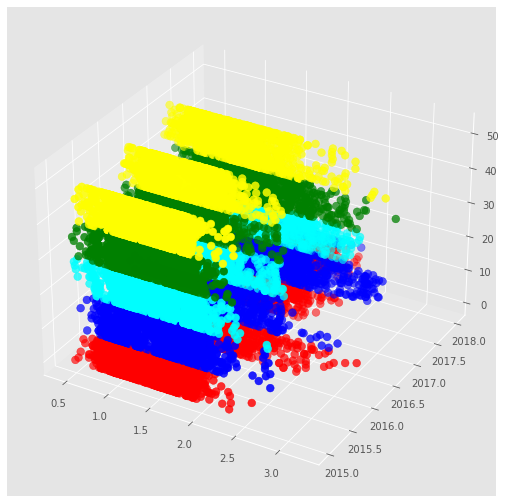

In [39]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)